In [1]:
import numpy as np
import matplotlib.pyplot as plt

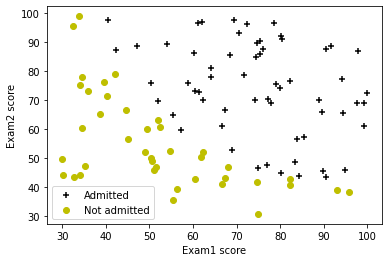

In [5]:
# Visualizing the data
data1 = np.loadtxt('../MachineLearning/data/ex2data1.txt', delimiter=',')
pos = data1[data1[:, 2] == 1]
neg = data1[data1[:, 2] == 0]
plt.scatter(pos[:, 0], pos[:, 1], c='k', marker='+')
plt.scatter(neg[:, 0], neg[:, 1], c='y', marker='o')
plt.legend(['Admitted', 'Not admitted'])
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.show()

In [20]:
# sigmoid function
def sigmoid(theta, X):
    z = X @ theta.reshape(-1, 1)
    return 1 / (1 + np.exp(-z))

In [74]:
# cost function and gradient
def cost(theta, X, Y):
    h = sigmoid(theta, X)
    inner = Y.T @ np.log(h) + (1 - Y).T @ np.log(1 - h)
    return -float(inner) / Y.shape[0]

def gradient(theta, X, Y):
    inner = X.T @ (sigmoid(theta, X) - Y)
    return  (inner / Y.shape[0]).T

In [84]:
import scipy.optimize as opt
theta1 = np.zeros(3)
data1X = np.c_[np.ones(data1.shape[0]), data1[:,0:2]]
data1Y = data1[:, 2].reshape(-1, 1)
result = opt.fmin_tnc(func=cost, x0=theta1, fprime=gradient, args=(data1X, data1Y))
result

  NIT   NF   F                       GTG
    0    1  6.931471805599450E-01   2.71082898E+02
    1    3  6.318123602631303E-01   7.89087138E-01
    2    5  5.892425204867887E-01   7.39226767E+01
    3    7  4.227823986951595E-01   1.85265640E+01
    4    9  4.072927005244141E-01   1.68671112E+01
    5   11  3.818854868504520E-01   1.07735127E+01
    6   13  3.786234888115828E-01   2.31584902E+01
tnc: stepmx = 1000
    7   16  2.389268507044400E-01   3.00822402E+00
    8   18  2.047203908077633E-01   1.52228703E-01
    9   20  2.046713909545504E-01   6.62496573E-02
   10   22  2.035303159304100E-01   9.30783005E-04
tnc: fscale = 32.7775
   11   24  2.035293518198920E-01   8.07129386E-06
   12   26  2.035251108624942E-01   1.80220310E-04
   13   28  2.034984113278517E-01   5.02922650E-04
   14   30  2.034978385742021E-01   9.94346282E-06
   15   32  2.034977909301941E-01   3.78219620E-06
   16   34  2.034977390536714E-01   1.95272031E-05
   17   36  2.034977015894744E-01   2.26909626E-13


(array([-25.16131869,   0.20623159,   0.20147149]), 36, 0)

因为$\theta_{0} + \theta_{1}x + \theta_{2}y = 0$时为决策线，故可解得y=...

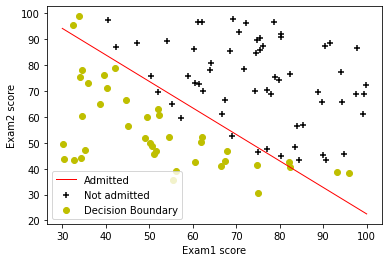

In [87]:
# plotDecisionBoundary
plotting_x = np.linspace(30, 100, 70)
plotting_y = (-result[0][0] - result[0][1] * plotting_x) / result[0][2]
plt.plot(plotting_x, plotting_y, c='r', linewidth=1)
plt.scatter(pos[:, 0], pos[:, 1], c='k', marker='+')
plt.scatter(neg[:, 0], neg[:, 1], c='y', marker='o')
plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.show()

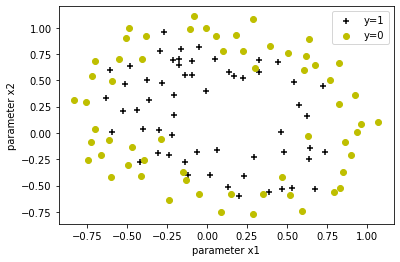

In [2]:
data2 = np.loadtxt('../MachineLearning/data/ex2data2.txt', delimiter=',')
pos2 = data2[data2[:, 2] == 1]
neg2 = data2[data2[:, 2] == 0]
plt.scatter(pos2[:, 0], pos2[:, 1], c='k', marker='+')
plt.scatter(neg2[:, 0], neg2[:, 1], c='y', marker='o')
plt.xlabel('parameter x1')
plt.ylabel('parameter x2')
plt.legend(['y=1','y=0'])
plt.show()

In [64]:
# Feature mapping
data2X1 = data2[:, 0]
data2X2 = data2[:, 1]
data2Y = data2[:, 2]
data2X = np.ones(data2.shape[0])

for i in range(1, 7):
    for j in range(0, i+1):
        t = np.power(data2X1, i-j) * np.power(data2X2, j)
        data2X = np.c_[data2X, t]

data2X.shape

(118, 28)

In [134]:
# Cost function and gradient
def costFunctionReg(theta, X, Y, lamd):
    h = sigmoid(theta, X)
    inner = Y @ np.log(h) + (1 - Y) @ np.log(1 - h)
    inner -= lamd / 2 * np.sum(np.power(theta[1:], 2))
    return -inner / Y.shape[0]

def gradientReg(theta, X, Y, lamd):
    inner = (X.T @ (sigmoid(theta, X) - Y.reshape(-1, 1))).T
    tmp = theta[0]
    theta[0] = 0
    inner += lamd * theta
    theta[0] = tmp
    return inner / Y.shape[0]

theta2 = np.zeros(data2X.shape[1])
costFunctionReg(theta2, data2X, data2Y, 1)

array([0.69314718])

In [141]:
import scipy.optimize as opt
lamd = 1
result = opt.fmin_tnc(func=costFunctionReg, x0=theta2, fprime=gradientReg, args=(data2X, data2Y, lamd))
result

  NIT   NF   F                       GTG
    0    1  6.931471805599450E-01   1.28006529E-02
    1    6  5.360727239857287E-01   9.47467579E-04
tnc: fscale = 32.4876
    2   11  5.291073406038783E-01   1.47916357E-05
    3   14  5.290104041994623E-01   3.98117354E-07
tnc: fscale = 1584.87
    4   19  5.290029439248476E-01   6.89671241E-09
    5   22  5.290028141676737E-01   3.25682250E-09
    6   27  5.290027426716971E-01   1.38845560E-09
tnc: |fn-fn-1] = 1.27072e-08 -> convergence
    7   32  5.290027299645271E-01   1.17137228E-11
tnc: Converged (|f_n-f_(n-1)| ~= 0)


(array([ 1.27271025,  0.62529964,  1.18111686, -2.01987398, -0.91743189,
        -1.43166927,  0.12393228, -0.36553118, -0.35725404, -0.17516291,
        -1.45817008, -0.05098418, -0.61558559, -0.27469165, -1.19271299,
        -0.24217841, -0.20603303, -0.04466178, -0.27778947, -0.29539513,
        -0.45645982, -1.04319153,  0.02779373, -0.29244865,  0.01555759,
        -0.32742404, -0.14389149, -0.92467488]),
 32,
 1)

In [117]:
def featureMapping(x, y):
    res = [1]
    for i in range(1, 7):
        for j in range(0, i+1):
            res.append(x ** (i-j) * y ** j)
    return np.array(res)
featureMapping(0.5, 0.75)

array([1.        , 0.5       , 0.75      , 0.25      , 0.375     ,
       0.5625    , 0.125     , 0.1875    , 0.28125   , 0.421875  ,
       0.0625    , 0.09375   , 0.140625  , 0.2109375 , 0.31640625,
       0.03125   , 0.046875  , 0.0703125 , 0.10546875, 0.15820312,
       0.23730469, 0.015625  , 0.0234375 , 0.03515625, 0.05273438,
       0.07910156, 0.11865234, 0.17797852])

In [143]:
#plotting the decesion boundary
test_x = np.linspace(-1, 1.5, 500)
test_y = np.linspace(-1, 1.5, 500)
plotting_x = []
plotting_y = []

resTheta = result[0]
for i in range(500):
    for j in range(500):
        res = resTheta @ featureMapping(test_x[i], test_y[j])
        if abs(res) <= 2 * 10 ** -3:
            plotting_x.append(test_x[i])
            plotting_y.append(test_y[j])

plt.title("Figure")
plt.scatter(pos2[:, 0], pos2[:, 1], c='k', marker='+')
plt.scatter(neg2[:, 0], neg2[:, 1], c='y', marker='o')
plt.scatter(plotting_x, plotting_y, c='r', marker='.')
plt.xlabel('parameter x1')
plt.ylabel('parameter x2')
plt.legend(['y=1','y=0', 'db'])
plt.show()